# Physics- and Data-Informed Aircraft Dynamics Model for Risk Assement and Model Form Error Estimation of Simulated Flight Paths

Author: Abhinav Subramanian - Vanderbilt University

Email: abhinav.subramanian@vanderbilt.edu

The goal of this demonstration is to showcase a dynamic model for aircraft simulation that incorporates physics-based estimates of flight quantities such as drag and thrust, as well as real flight, data to produce flight path predictions. The physics model results, combined with flight data from a public database (FlightAware), are used to assess and correct model form errors in the simulation, as well as obtain risk and safety assesments for the simulated flight path.

[insert figure here ... ]

This notebook is the first of three parts of the model demonstration:

1. Extracting trajectory data from a public database (FlightAware)
2. Analyzing the extracted data to detect flight phases 
3. Demonstration of the composite aircraft dynamics model.

# Part 1. Extracting trajectory data from a public database (FlightAware)

This is a demonstration of the process of extracting and analyzing flight data from FlightAware. The data extracted includes time, course information (coordinates and heading), True AirSpeed (TAS), and altitude for each point along the flight path. 

The data extracted is analyzed to identify flight phases (climb, cruise, descent) and detect anomalies, such as stalling during the climb phase and climbing during the cruise phase, to compile a flight safety assessment.

## Module requirements:

The following packages are required to run this module:

- **[```numpy```]**
    - Provides support for array operations 
    
- **[```matplotlib```]**
    - Main plotting functionalities

- **[```pandas```]**
    - Provides data structures and operations for manipulating numerical tables and time series

- **[```datetime```]**
    - Supplies classes for manipulating dates and times

These packages are part of the standard Python library (no installation needed). The following can be installed using ```conda install packagename```.

- **[```lxml```]**
    - Pythonic binding for XML processing, called in the submodule ```pyfn_FlightAware_trajectory_extractor```.

The module calls the follwing submodules (stored in separate files):

- **[```pyfn_FlightAware_trajectory_extractor.py```]**
    - Main function for extracting data from FlightAware
    
- **[```fn_flight_phases.py```]**
    - Identifies different flight phases
    
This module also requires a valid FlightAware URL for a completed flight [eg. 'https://flightaware.com/live/flight/UAL1895/history/20200224/1225Z/KTPA/KIAH/tracklog']



## Procedure 1: Importing FlightAware Data

In [1]:
from fn_FlightAware_TrajData import pyfn_FlightAware_trajectory_extractor
from fn_flight_phases import pyfn_flight_phase

import matplotlib.pyplot as plt
import numpy as np

Input: a valid FlightAware URL (FA_URL)

In [2]:
FA_URL = 'https://flightaware.com/live/flight/AAL302/history/20210806/2240Z/KJFK/KLAX/tracklog'

In [3]:
# Extract FlightAware Data to pandas DataFrame
df = pyfn_FlightAware_trajectory_extractor(FA_URL)
df.head()

,Time_s,Latitude,Longitude,Course_deg,TAS_kts,TAS_mph,Altitude_ft,ROCD
0,0.0,40.6338,-73.7845,121.0,167.0,192.0,325.0,0.0
1,16.0,40.6256,-73.7758,154.0,155.0,178.0,975.0,1875.0
2,32.0,40.6134,-73.7719,169.0,164.0,189.0,1325.0,984.0
3,48.0,40.6022,-73.7699,181.0,183.0,211.0,1500.0,844.0
4,64.0,40.5884,-73.7736,196.0,198.0,228.0,1775.0,891.0


## Procedure 2: Flight Aware Data Visualization

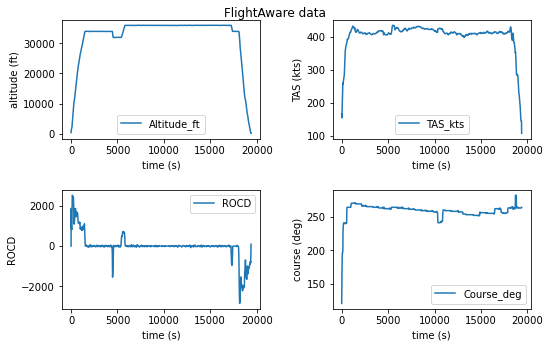

In [8]:
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(8,5))
axes = axes.flatten()

ax=axes[0]
df.plot(x='Time_s',y='Altitude_ft',ax=ax)
ax.set_xlabel('time (s)')
ax.set_ylabel('altitude (ft)')

ax=axes[1]
df.plot(x='Time_s',y='TAS_kts',ax=ax)
ax.set_xlabel('time (s)')
ax.set_ylabel('TAS (kts)')

ax=axes[2]
df.plot(x='Time_s',y='ROCD',ax=ax)
ax.set_xlabel('time (s)')
ax.set_ylabel('ROCD')

ax=axes[3]
df.plot(x='Time_s',y='Course_deg',ax=ax)
ax.set_xlabel('time (s)')
ax.set_ylabel('course (deg)')

plt.tight_layout(pad=2.0)
plt.suptitle('FlightAware data');

## Procedure 3: Processing Recorded Trajectory Data
####    (a) Detecting step climb during the cruise phase (multiple altitude levels at cruise)

In [11]:
ROCD = df.ROCD.values
Altitude_ft = df.Altitude_ft.values
Time_s = df.Time_s.values

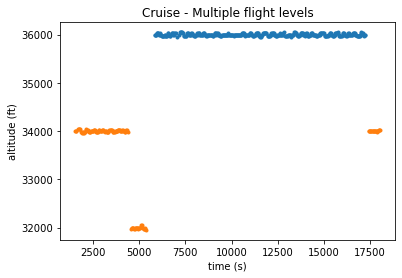

In [12]:
Ix_ToC, Ix_ToD, time_cluster_all, alt_cluster_all, hold_descent_altitudes = pyfn_flight_phase(ROCD, Altitude_ft, Time_s)
# If step climb was detected, plot multiple altitude levels at cruise
N_cruise_clusters = len(alt_cluster_all)
if N_cruise_clusters>1:    
    plot2 = plt.figure(2)
    for ix in range(N_cruise_clusters):
        plt.plot(time_cluster_all[ix],alt_cluster_all[ix],'.')
    plt.xlabel('time (s)')
    plt.ylabel('altitude (ft)')
    plt.title('Cruise - Multiple flight levels')
# Note: Ignore the convergence warnings.

#### (b): Check if the aircraft was held at a constant altitude during descent phase

In [13]:
# Test whether the aircraft was held at a constant altitude during descent for a significant time duration (> 80 sec)
if len(hold_descent_altitudes)>0:
    print('Aircraft was held at a constant level during descent at the following altitude(s) [Units: ft.]:')
    print(hold_descent_altitudes)
else:
    print('"Hold at altitude" not detected during descent')

"Hold at altitude" not detected during descent
